In [1]:
##Waste Management Using CNN

In [2]:
pip install pandas

In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import os


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Activation,Dropout,Flatten, Dense, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [6]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"


In [7]:
x_data = []
y_data = []

for category in glob(os.path.join(train_path, "*")):
    for file in tqdm(glob(os.path.join(category, "*"))):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))

data = pd.DataFrame({'image': x_data, "label": y_data})


100%|██████████| 8058/8058 [00:12<00:00, 620.35it/s]


In [8]:
print(f"Data shape: {data.shape}")


Data shape: (20623, 2)


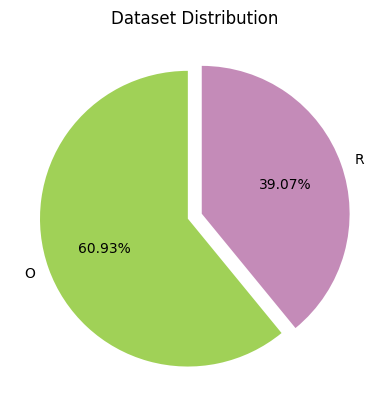

In [9]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data['label'].value_counts(), 
        labels=data['label'].value_counts().index, 
        autopct='%0.2f%%', 
        colors=colors, 
        startangle=90, 
        explode=[0.05] * len(data['label'].value_counts()))
plt.title("Dataset Distribution")
plt.show()